# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rahmat Hidayat
- **Email:** yamato.open.wano@gmail.com
- **ID Dicoding:** baakanides

## Menentukan Pertanyaan Bisnis

- 1.Apa faktor cuaca yang paling mempengaruhi jumlah total pengguna sepeda?
- 2.Berapa rata-rata jumlah pengguna pada hari kerja dibandingkan dengan hari libur dalam satu tahun?
- 3.Relevant: Bagaimana hubungan antara suhu dan jumlah pengguna sepeda?
- 4.Time-bound:  Apa rata-rata jumlah pengguna sepeda bulanan selama 1 tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

1. Menyiapkan dataset

In [2]:
df_day = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding-2024/main/data/day.csv")
df_day.head(10) # menampilkan 10 baris pertama

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
df_hour = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding-2024/main/data/hour.csv")
df_hour.head(10) # menampikan 10 baris pertama

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**


> Dataset df_day

*   Terdapat 16 kolom berbeda dengan 1 kolom instant (no urut) 12 kolom (variable independen) dan 3 kolom (variable dependen) yank casual, registered, dan cnt

* Keterangan kolom df_day

| Kolom        | Penjelasan                                                                                   |
|--------------|----------------------------------------------------------------------------------------------|
| instant      | Identifier unik/no urut untuk setiap baris data.                                                    |
| dteday       | Tanggal dalam format YYYY-MM-DD.                                                            |
| season       | Musim (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin).                   |
| yr           | Tahun (0: 2011, 1: 2012).                                                                    |
| mnth         | Bulan (1 sampai 12).                                                                         |
| holiday      | Indikator apakah hari tersebut adalah hari libur (0: bukan, 1: ya).                        |
| weekday      | Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu).                                  |
| workingday   | Indikator apakah hari tersebut adalah hari kerja (0: bukan, 1: ya).                         |
| weathersit   | Kode kondisi cuaca (1: Cerah, Berawan sebagian, 2: Kabut + Berawan,3: Hujan ringan, 4: Hujan lebat).                             |
| temp         | Suhu dalam skala 0-1 (0: beku, 1: sangat panas).                                           |
| atemp        | Suhu yang dirasakan, dinyatakan dalam skala 0-1.                                           |
| hum          | Kelembapan relatif, dinyatakan dalam skala 0-1.                                            |
| windspeed    | Kecepatan angin, dinyatakan dalam skala 0-1.                                               |
| casual       | Jumlah pengguna sepeda yang tidak terdaftar.                                               |
| registered   | Jumlah pengguna sepeda yang terdaftar.                                                     |
| cnt          | Total pengguna sepeda (casual + registered).                                               |

-----
> Dataset df_hour

* Terdapat 17 kolom berbeda dengan 1 kolom instant (no urut) 13 kolom (variable independen) dan 3 kolom (variable dependen) yank casual, registered, dan cnt

* Keterangan df_hour

| Kolom        | Penjelasan                                                                                   |
|--------------|----------------------------------------------------------------------------------------------|
| instant      | Identifier unik untuk setiap baris data.                                                    |
| dteday       | Tanggal dalam format YYYY-MM-DD.                                                            |
| season       | Musim (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin).                   |
| yr           | Tahun (0: 2011, 1: 2012).                                                                    |
| mnth         | Bulan (1 sampai 12).                                                                         |
| hr           | Jam dalam format 0 sampai 23.                                                               |
| holiday      | Indikator apakah hari tersebut adalah hari libur (0: bukan, 1: ya).                        |
| weekday      | Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu).                                  |
| workingday   | Indikator apakah hari tersebut adalah hari kerja (0: bukan, 1: ya).                         |
| weathersit   | Kode kondisi cuaca (1: Cerah, Berawan sebagian, 2: Kabut + Berawan,3: Hujan ringan, 4: Hujan lebat)                             |
| temp         | Suhu dalam skala 0-1 (0: beku, 1: sangat panas).                                           |
| atemp        | Suhu yang dirasakan, dinyatakan dalam skala 0-1.                                           |
| hum          | Kelembapan relatif, dinyatakan dalam skala 0-1.                                            |
| windspeed    | Kecepatan angin, dinyatakan dalam skala 0-1.                                               |
| casual       | Jumlah pengguna sepeda yang tidak terdaftar pada jam tersebut.                              |
| registered   | Jumlah pengguna sepeda yang terdaftar pada jam tersebut.                                    |
| cnt          | Total pengguna sepeda pada jam tersebut (casual + registered).                              |
  

### Assessing Data

1. Menilai dataset df_hour

In [4]:
df_hour.info() # menampilkan info terkait dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dari info dataset yang kita lihat, tidak ada masalah dengan missing value. Namun ada masalah pada type data dteday yang seharusnya bertipe datetime untuk memudahkan analis data

In [5]:
df_hour.isna().sum() # memastikan tidak ada missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
print(f"Jumblah duplikat data {df_hour.duplicated().sum()}") # menampilkan jumblah data yang duplikat

Jumblah duplikat data 0


In [7]:
df_hour.describe() # menampikan statistik deskriptif dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


2. Menilai dataset df_day

In [8]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print(f"Jumblah duplikat data {df_day.duplicated().sum()}")

Jumblah duplikat data 0


In [11]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- pada dadaset df_hour & df_day tidak memiliki missing value dan duplicated data
- pada dataset df_hour & df_day pada kolom yang dteday bermasalah terkait typedata nya

### Cleaning Data

1. cleaning data df_hour

Memastikan bahwa tidak ada missing value dan duplicate data

In [12]:
# menghapus missing value dan duplikat data
df_hour.dropna(axis=0, inplace=True)
df_hour.drop_duplicates(inplace=True)

print(df_hour.isnull().sum())
print(f"Jumblah duplikat data {df_hour.duplicated().sum()}")

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumblah duplikat data 0


mengganti typeda data kolom dteday menjadi datetime

In [13]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_hour["dteday"].info()
df_hour.head()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. cleaning data df_day

memastikan tidak ada missing value dan duplicate data

In [14]:
df_day.dropna(axis=0, inplace=True)
df_day.drop_duplicates(inplace=True)

print(df_day.isnull().sum())
print(f"Jumblah duplikat data {df_day.duplicated().sum()}")

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumblah duplikat data 0


mengganti type data kolom dteday menjadi datetime

In [15]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_hour["dteday"].info()
df_hour.head()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dataset sudah bersih dari missing value, duplicated nilai, dan type data
- sudah siap untuk ke proses selanjutnya

## Exploratory Data Analysis (EDA)

1. Mengganti isi kolom mnth, yr,

In [16]:
#data df_hour
df_hour['yr']= df_hour['yr'].map({0:"2011", 1: "2012"})
df_hour['mnth']= df_hour['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

#data df_day
df_day['yr']= df_day['yr'].map({0:"2011", 1: "2012"})
df_day['mnth']= df_day['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

2. Mengganti isi kolom season dan weathersit

In [17]:
#data df_hour
df_hour["season"] = df_hour["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df_hour["weathersit"] = df_hour["weathersit"].map({1: "Clear", 2: "Cloudy", 3: "Rain", 4: "Heavy Rain"})

#data df_day
df_day["season"] = df_day["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df_day["weathersit"] = df_day["weathersit"].map({1: "Clear", 2: "Cloudy", 3: "Rain", 4: "Heavy Rain"})

### Explore hubungan cuaca dengan jumblah total pengguna

In [18]:
df_hour.groupby(by="weathersit").agg({
    "casual":["sum"],
    "registered":["sum"],
    "cnt":["sum"]
}).sort_values(("cnt", "sum"), ascending=False)

,casual,registered,cnt
,sum,sum,sum
weathersit,,,
Clear,462745,1875428,2338173
Cloudy,134481,661471,795952
Rain,22783,135548,158331
Heavy Rain,8,215,223


 jumblah penyewa tertinggi saat cuaca cerah, dan jumblah penyewa terendah saat cuaca hujan lebat

### explore hubungan musim dengan jumblah pengguna

In [19]:
df_day.groupby(by="season").agg({
    'casual':["sum"],
    'registered':["sum"],
    'cnt':["sum"]
}).sort_values(('cnt', 'sum'), ascending=False)

,casual,registered,cnt
,sum,sum,sum
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


jumblah penyewa tertinggi saat musim gugur, dan penyewa terendah saat musim semi

### explore korelasi suhu,kelembapan, dan kecepatan angin dengan jumblah pengguna

In [20]:
df_heatmap = df_day[["casual","registered","cnt","temp", "atemp", "hum", "windspeed"]]

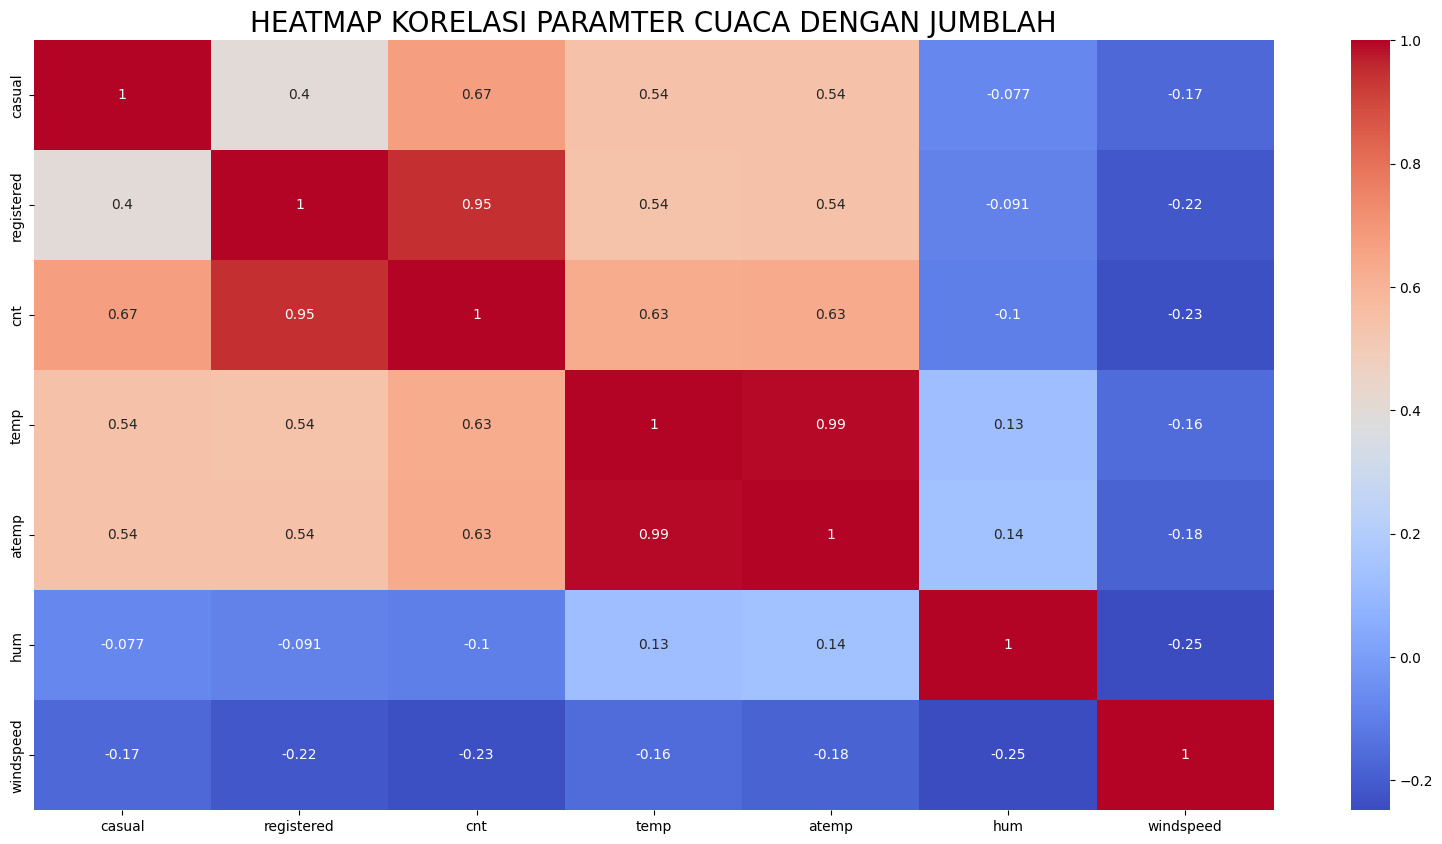

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_heatmap.corr(numeric_only=True), annot= True, cmap='coolwarm')
plt.title('Heatmap korelasi paramter cuaca dengan jumblah'.upper(), fontsize= 20, y=1)

plt.show()

ke empat parameter ternyata tidak memiliki korelasi yang tinggi dengan jumblah penyewaan

### explore jumblah pengguna setiap bulan

In [22]:
df_day.groupby(by=["yr","mnth"]).agg({
    'casual':["sum"],
    'registered':["sum"],
    'cnt':["sum"]
}).sort_values([("cnt", "sum")], ascending=False).round()

casual registered     cnt
             sum        sum     sum
yr   mnth                          
2012 Sep   43778     174795  218573
     Aug   43197     171306  214503
     Jul   41705     161902  203607
     Jun   43294     159536  202830
     Oct   34538     164303  198841
     May   44235     151630  195865
     Apr   38456     135768  174224
     Mar   31618     133257  164875
     Nov   21009     131655  152664
2011 Jun   30612     112900  143512
     Jul   36452     104889  141341
     Aug   28842     107849  136691
     May   31050     104771  135821
     Sep   26545     100873  127418
2012 Dec   13245     110468  123713
2011 Oct   25222      98289  123511
2012 Feb    8721      94416  103137
2011 Nov   15594      86573  102167
2012 Jan    8969      87775   96744
2011 Apr   22346      72524   94870
     Dec    8448      78875   87323
     Mar   12826      51219   64045
     Feb    6242      41973   48215
     Jan    3073      35116   38189

2011 terbanyak di bulan Juni, dan minimum di bulan Januari


2012 terbanyak di bulan September, dan minimum di bulan Januari

### explore jumblah pengguna pada hari kerja dan hari libur

In [23]:
# Filter hari kerja dan hari libur
workingday_data = df_day[(df_day['workingday'] == 1) & (df_day["yr"] == "2012")]
holiday_data = df_day[(df_day['holiday'] == 1) & (df_day["yr"] == "2012")]

# Hitung rata-rata pengguna
avg_workingday_users = workingday_data['cnt'].mean().round()
avg_holiday_users = holiday_data['cnt'].mean().round()

print(f'Rata-rata pengguna pada hari kerja: {avg_workingday_users}')
print(f'Rata-rata pengguna pada hari libur: {avg_holiday_users}')


Rata-rata pengguna pada hari kerja: 5745.0
Rata-rata pengguna pada hari libur: 4401.0


**Insight:**
1. jumblah penyewa tertinggi saat cuaca cerah, dan jumblah penyewa terendah saat cuaca hujan lebat
2. jumblah penyewa tertinggi saat musim gugur, dan penyewa terendah saat musim semi
3. ke empat parameter ternyata tidak memiliki korelasi yang tinggi dengan jumblah penyewaan
4. - 2011 terbanyak di bulan Juni, dan minimum di bulan Januari
  - 2012 terbanyak di bulan September, dan minimum di bulan Januari
5. - Rata-rata pengguna pada hari kerja: 5745.0
  - Rata-rata pengguna pada hari libur: 4401.0

## Visualization & Explanatory Analysis

### Pertanyaan 1. Apa faktor cuaca yang paling mempengaruhi jumlah total pengguna sepeda?

In [24]:
faktor_cuaca_df = df_hour[['weathersit','cnt']].groupby(by="weathersit").agg({
    "cnt":["sum"]
}).sort_values(("cnt", "sum"), ascending=False)

faktor_cuaca_df

,cnt
,sum
weathersit,
Clear,2338173
Cloudy,795952
Rain,158331
Heavy Rain,223


<ipython-input-25-61b0ed2c0463>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faktor_cuaca_df,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to

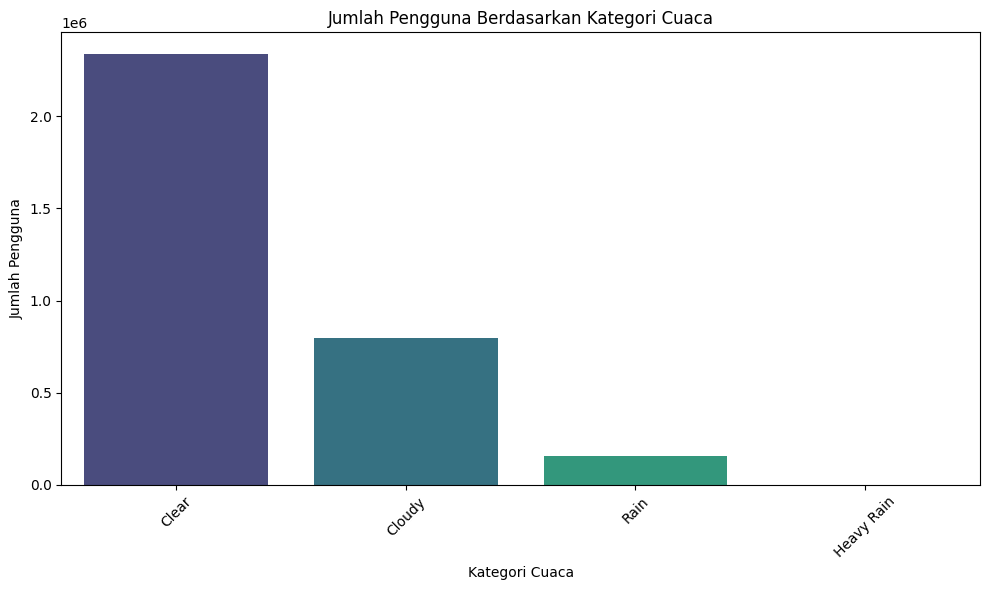

In [25]:
# Mengubah nama kolom menjadi 'cnt' untuk menyederhanakan tampilan DataFrame
faktor_cuaca_df.columns = ['cnt']
faktor_cuaca_df = faktor_cuaca_df.reset_index()

# Visualisasi data
plt.figure(figsize=(10, 6))
sns.barplot(data=faktor_cuaca_df,
            x='weathersit',
            y='cnt',
            palette='viridis')

plt.title('Jumlah Pengguna Berdasarkan Kategori Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Pertanyaan 2. Berapa rata-rata jumlah pengguna pada hari kerja dibandingkan dengan hari libur dalam satu tahun terakhir?

In [26]:
# Filter hari kerja dan hari libur
workingday_data = df_day[(df_day['workingday'] == 1) & (df_day["yr"] == "2012")]
holiday_data = df_day[(df_day['holiday'] == 1) & (df_day["yr"] == "2012")]

# Hitung rata-rata pengguna
avg_workingday_users = workingday_data['cnt'].mean().round()
avg_holiday_users = holiday_data['cnt'].mean().round()

print(f'Rata-rata pengguna pada hari kerja: {avg_workingday_users}')
print(f'Rata-rata pengguna pada hari libur: {avg_holiday_users}')

Rata-rata pengguna pada hari kerja: 5745.0
Rata-rata pengguna pada hari libur: 4401.0


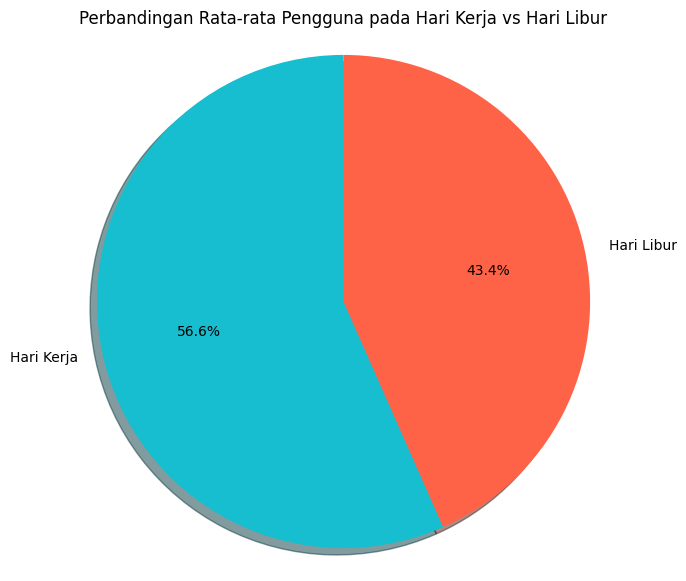

In [27]:
# Data untuk plotting
labels = ['Hari Kerja', 'Hari Libur']
avg_users = [avg_workingday_users, avg_holiday_users]
colors = ['#17becf', '#ff6347']

# Membuat pie chart
plt.figure(figsize=(7,7))
plt.pie(avg_users, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Perbandingan Rata-rata Pengguna pada Hari Kerja vs Hari Libur')
plt.axis('equal')
plt.show()

### Pertanyaan - 3. Bagaimana hubungan antara suhu dan jumlah pengguna sepeda?

In [28]:
df_heatmap = df_day[["casual","registered","cnt","temp", "atemp", "hum", "windspeed"]]

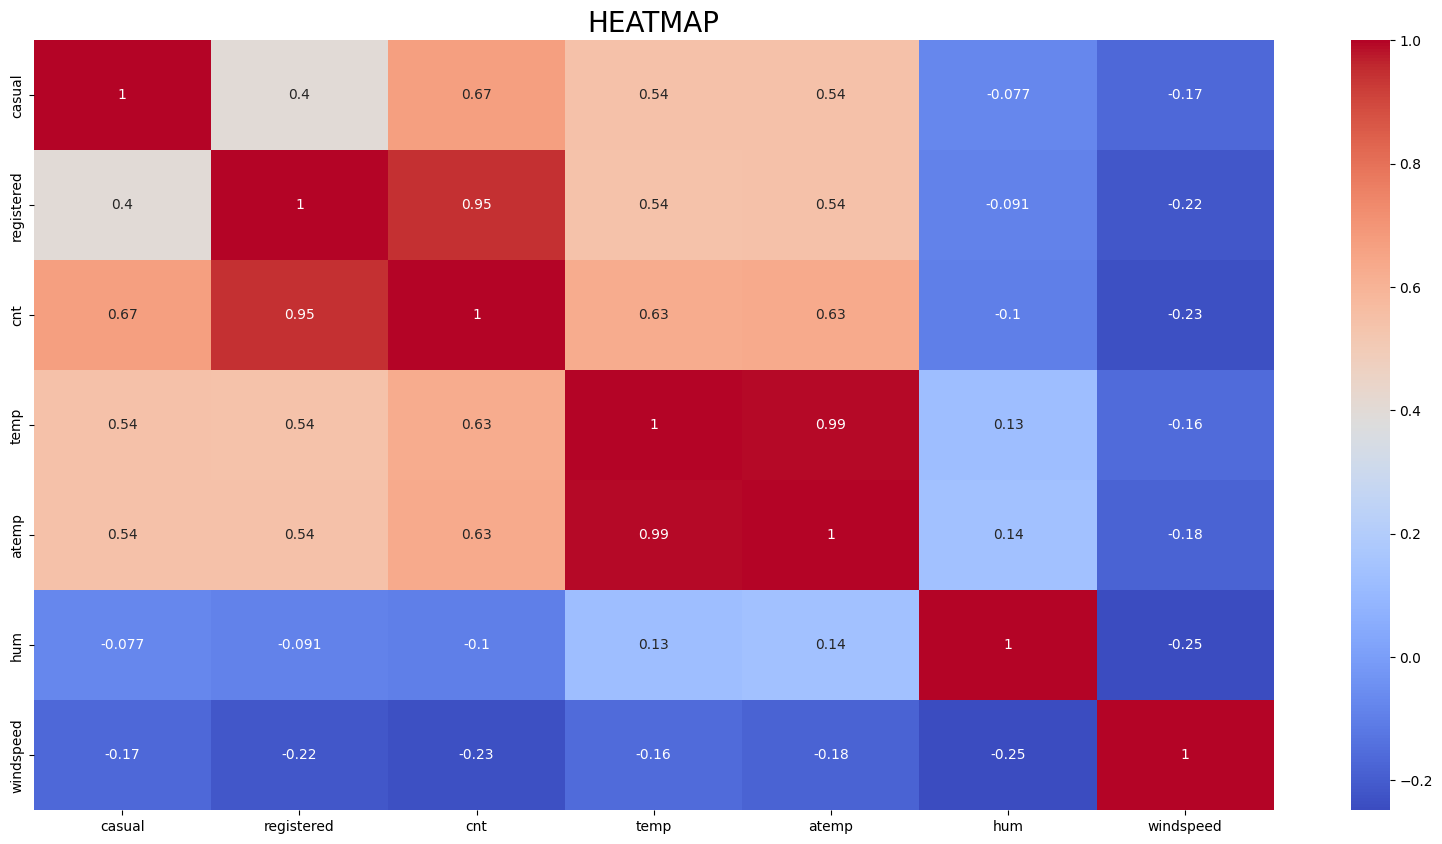

In [29]:
plt.figure(figsize=(20,10))

#plotting heatmap
sns.heatmap(df_heatmap.corr(numeric_only=True), annot= True, cmap='coolwarm')
plt.title('Heatmap'.upper(), fontsize= 20, y=1)

plt.show()

### Pertanyaan 4. Apa rata-rata jumlah pengguna sepeda bulanan selama 1 tahun terakhir?

In [30]:
df_day.groupby(by=["yr","mnth"]).agg({
    'casual':["sum"],
    'registered':["sum"],
    'cnt':["sum"]
}).round()

casual registered     cnt
             sum        sum     sum
yr   mnth                          
2011 Apr   22346      72524   94870
     Aug   28842     107849  136691
     Dec    8448      78875   87323
     Feb    6242      41973   48215
     Jan    3073      35116   38189
     Jul   36452     104889  141341
     Jun   30612     112900  143512
     Mar   12826      51219   64045
     May   31050     104771  135821
     Nov   15594      86573  102167
     Oct   25222      98289  123511
     Sep   26545     100873  127418
2012 Apr   38456     135768  174224
     Aug   43197     171306  214503
     Dec   13245     110468  123713
     Feb    8721      94416  103137
     Jan    8969      87775   96744
     Jul   41705     161902  203607
     Jun   43294     159536  202830
     Mar   31618     133257  164875
     May   44235     151630  195865
     Nov   21009     131655  152664
     Oct   34538     164303  198841
     Sep   43778     174795  218573

In [31]:
df_yr2012 = df_hour[df_hour["yr"] == '2012']
df_yr2012 = df_yr2012[['yr', 'mnth', 'cnt']]

df_yr2012 = df_yr2012.groupby(by=["mnth"]).agg({
    'cnt': ["sum"]
}).round()

# Mengubah nama kolom menjadi 'cnt'
df_yr2012.columns = ['cnt']
df_yr2012 = df_yr2012.reset_index()

# Menetapkan urutan bulan
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Mengubah kolom 'mnth' menjadi kategori dengan urutan yang ditetapkan
df_yr2012['mnth'] = pd.Categorical(df_yr2012['mnth'], categories=months_order, ordered=True)

# Mengurutkan DataFrame berdasarkan bulan
df_yr2012 = df_yr2012.sort_values('mnth').reset_index(drop=True)

df_yr2012

,mnth,cnt
0,Jan,96744
1,Feb,103137
2,Mar,164875
3,Apr,174224
4,May,195865
5,Jun,202830
6,Jul,203607
7,Aug,214503
8,Sep,218573
9,Oct,198841


<ipython-input-32-ef02474952a3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_yr2012,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass

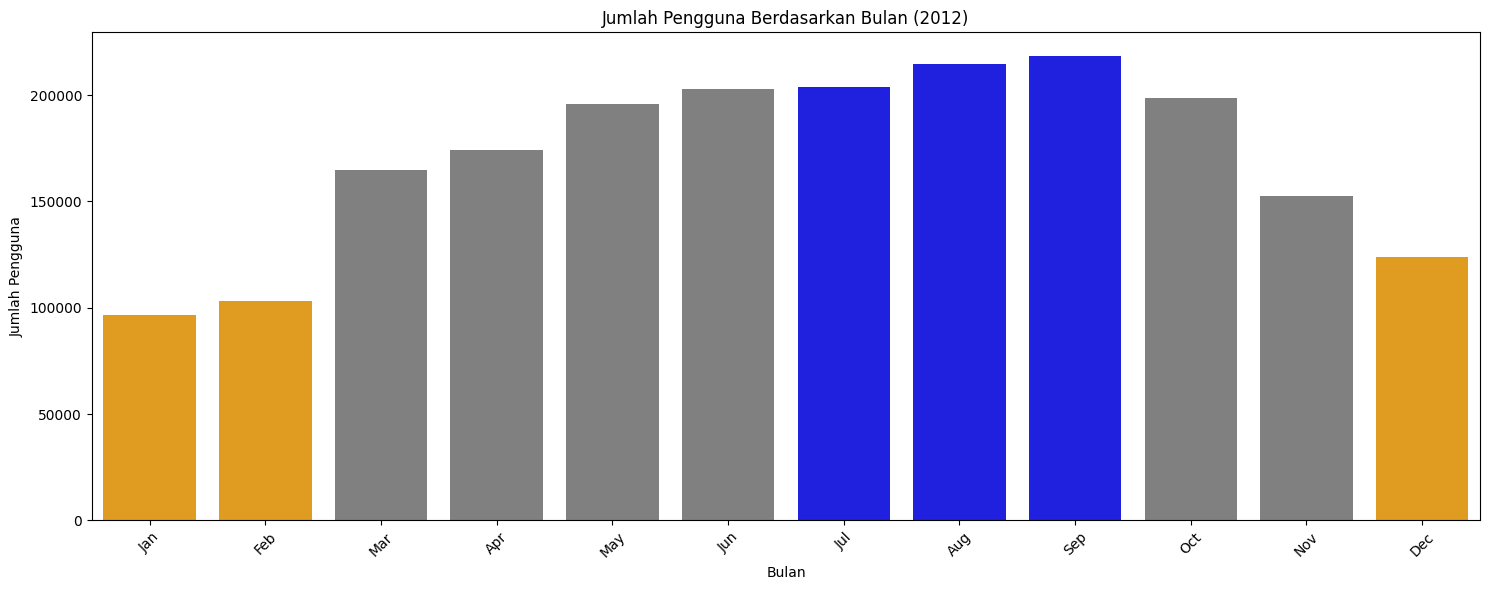

In [32]:
# Mengurutkan DataFrame untuk menemukan 3 nilai tertinggi dan terendah
sorted_df = df_yr2012.sort_values(by='cnt', ascending=False)

# Mendapatkan 3 tertinggi dan 3 terendah
top_indices = sorted_df.head(3).index
bottom_indices = sorted_df.tail(3).index

# Menentukan warna
colors = []
for index in df_yr2012.index:
    if index in top_indices:
        colors.append('blue')
    elif index in bottom_indices:
        colors.append('orange')
    else:
        colors.append('grey')

# Visualisasi data
plt.figure(figsize=(15, 6))
sns.barplot(data=df_yr2012,
            x='mnth',
            y='cnt',
            palette=colors)

plt.title('Jumlah Pengguna Berdasarkan Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
-  jumblah tertinggi adalah di saat cuaca sedang cerah, dan terendah saat sedang hujan
-  rata-rata pengguna harian pada saat hari kerja lebih tinggi di bandingan saat hari libur
- tidak ada korelasi yang tinggi parameter cuaca (suhu, suhu yang dirasakan, kecepatan angin, kelembapan) terhadap jumblah
- 3 bulan teratas dan 3 bulan terendah selalu berurutan, ini sesuai siklus musim


## Analisis Lanjutan dengan clustering berdasarkan waktu (jam)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


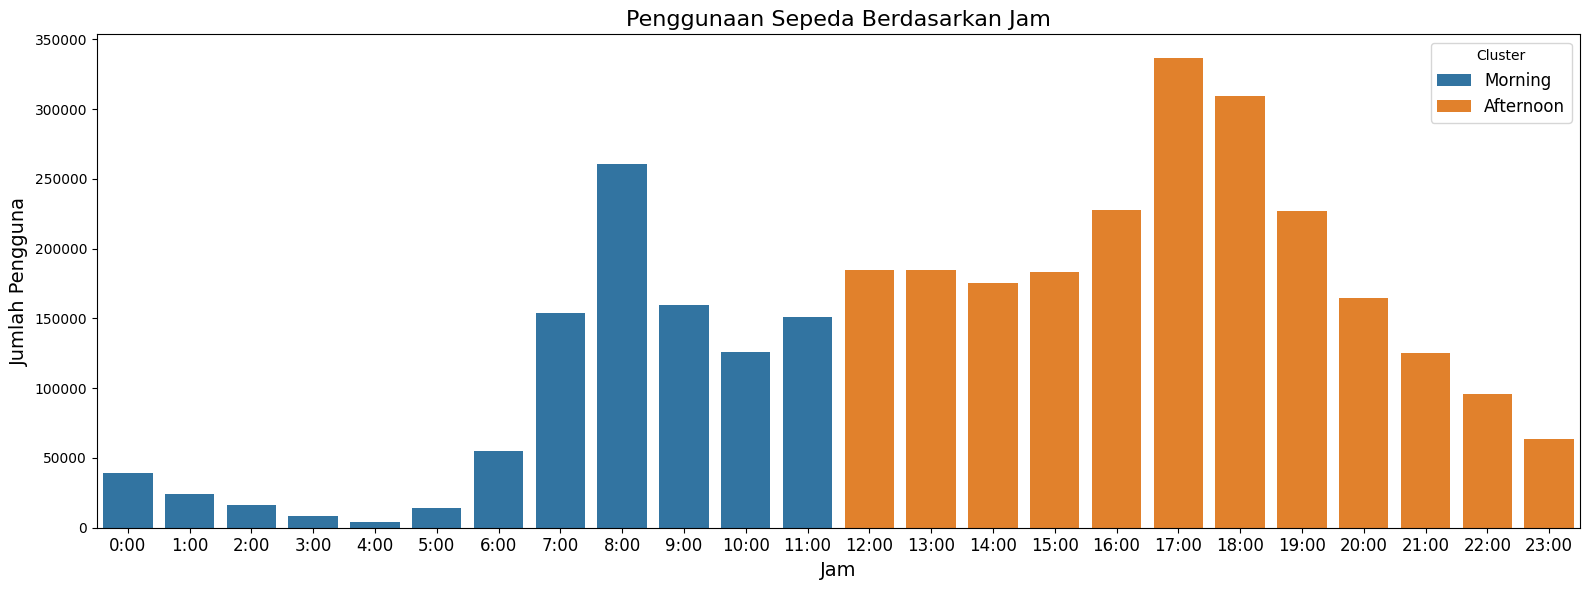

In [33]:
# Clustering sederhana berdasarkan waktu
# Ambil jam dari df_hour untuk clustering
hourly_usage = df_hour.groupby('hr')['cnt'].sum().reset_index()

# Menentukan dua cluster manual berdasarkan jam
hourly_usage['Cluster'] = ['Morning' if hr < 12 else 'Afternoon' for hr in hourly_usage['hr']]

# Visualisasi cluster
plt.figure(figsize=(16, 6))
sns.barplot(data=hourly_usage, x='hr', y='cnt', hue='Cluster')

# Menambahkan detail visual
plt.title('Penggunaan Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Mengatur format label jam
plt.xticks(ticks=range(0, 24), labels=[f"{hr}:00" for hr in range(24)], fontsize=12)

plt.legend(title='Cluster', fontsize=12)
plt.tight_layout()

# Menampilkan plot
plt.show()

Tujuan clustering berdasarkan jam, adalah untuk mengetahui traffic jam tertinggi dalam pemesanan. sehingga bisa mengantisipati penurunan kinerja app/web agar tidak mengganggu para pengguna

## Conclusion

- Conclution pertanyaan 1: jumblah penyewa tertinggi saat cuaca cerah, dan jumblah penyewa terendah saat cuaca hujan lebat. karena hujan lebat scope nya sangat kecil/sangar jarang sekali. sehingga jumblah penyewa paling sedikit saat terjadi hujan/gerimis.
- Conclution pertanyaan 2: rata2 pengguna harian pada 1 tahun terakhir pada hari kerja lebih tinggi di banding hari libur. sehingga di perlukan promosi/kampanye tentang hidup sehat dengan bersepeda di hari libur. Dan memberikan diskon bagi pengguna di hari libur dengan syarat tertentu
- Conclution pertanyaan 3: dari keempat parameter cuaca (suhu, suhu yang dirasakan, kecepatan angin, dan kelembapan) tidak menunjukan korelasi/hubungan yang tinggi dengan jumblah penyewaan
- Conclution pertanyaan 4: 3 bulan teratas Juli, Agustus, September dan 3 bulan terbawah Desember, Januaru, Februari. jika dilihat dari bulannya ini menandakan hubungan dengan pengaruh musim. yakni pada musim dingin, jumblah penyewaan sangat menurun. sehingga perlu solusi lebh lanjut

In [34]:
#mengekspor dataset yang sudah di berishkan
df_hour.to_csv("df_bike_hour.csv", index=False )
df_day.to_csv("df_bike_day.csv", index=False )